# Project 11-- [Adam] [Ornelas]

## Question 1

In [9]:
library(data.table)
myDF <- fread("/anvil/projects/tdm/data/flights/subset/1990.csv")

In [32]:

monthlydepdelays <- function(year) {
    myDF <- fread(paste0("/anvil/projects/tdm/data/flights/subset/", year, ".csv"))
    origin<-myDF[Origin == 'IND']
    myvalue <- tapply(origin$DepDelay, origin$Month, mean, na.rm = TRUE)
    return(myvalue)
}
#I subset all the the df so that I only have values with origin == IND
#I insert depdelay first cause I want to find the average based on the month 
# and i took out all the NA 

In [33]:
monthlydepdelays(1990)
#Try with 1990

1        2        3        4        5        6        7        8 
7.282772 9.497027 6.924841 4.949858 5.471487 6.010835 4.307377 5.639782 
       9       10       11       12 
4.455586 4.473725 3.408304 9.764105

In [29]:
monthlydepdelays(1998)

1         2         3         4         5         6         7         8 
 6.314439  5.866770  9.898317  7.766752  8.980092 15.866469  7.579602  5.765383 
        9        10        11        12 
 3.122498  5.169646  4.346535  9.228510

In [30]:
monthlydepdelays(2005)

1         2         3         4         5         6         7         8 
 7.689248  4.956196  6.881828  2.988902  1.302440  8.472591 12.218633  6.812698 
        9        10        11        12 
 2.795146  4.850184  4.897145 11.572550

## Question 2

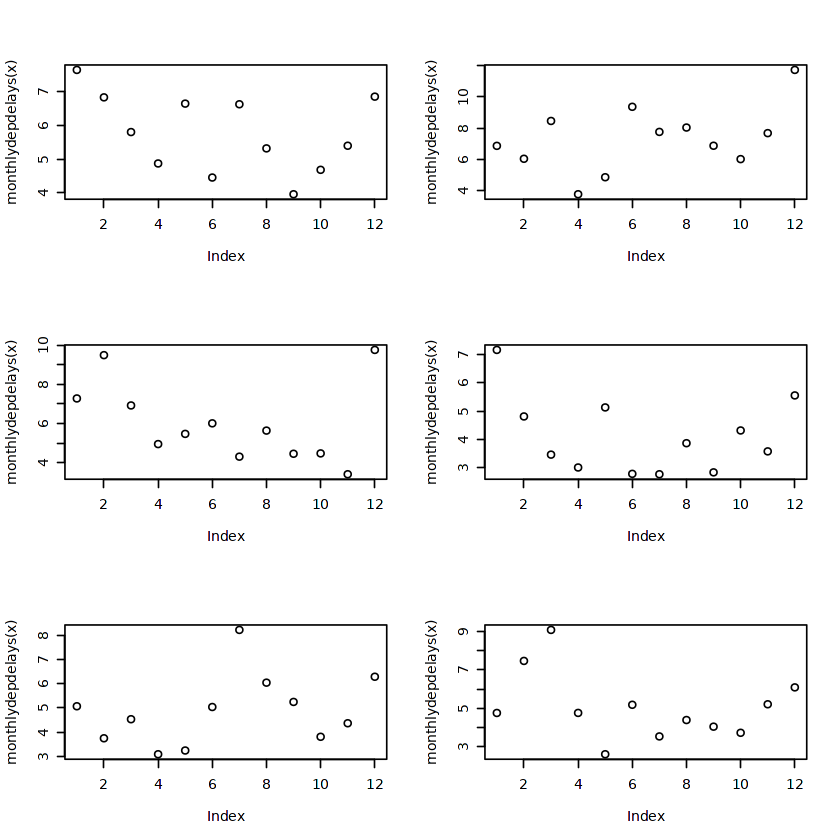

In [34]:
par(mfrow=c(3,2))
myresults <- sapply(1988:1993, function(x) plot(monthlydepdelays(x)))
#plotting the results for 6 different years
#we can see they vary by a lot non of them are linear

## Question 3

In [41]:
myindycitiess <- function(myyear) {
    myDF <- fread(paste0("/anvil/projects/tdm/data/election/itcont", myyear, ".txt"), quote="", select = c(9,10,15))
    names(myDF) <- c("city", "state", "donation")
    newDF<-myDF[myDF$state == 'IN']
    myvalue <- tapply(newDF$donation, newDF$city,sum, na.rm = TRUE)
    x<-tail(sort(myvalue), 10)
    return(x)
}
#This function subsets a new df based on state == IN then we can insert donations as our number to estimate based on each city 
#each city will only be from IN since thats how we did the subset

In [45]:
#years 1980, 1986, and 1992
myindycitiess(1984)

FT WAYNE  TERRE HAUTE       CARMEL   EVANSVILLE   SOUTH BEND       INDPLS 
       44665        52650        53200        65250        68387        76520 
  FORT WAYNE      ELKHART       MUNCIE INDIANAPOLIS 
       80882        93171       104260       511935

In [43]:
tail(sort(myindycitiess(1986)), 10)

COLUMBUS   ZIONSVILLE  TERRE HAUTE       CARMEL   SOUTH BEND   EVANSVILLE 
       40400        50900        62361        75993        81841        84815 
     ELKHART       MUNCIE   FORT WAYNE INDIANAPOLIS 
      100350       100433       149194       995379

In [46]:
tail(sort(myindycitiess(1992)), 10)

ZIONSVILLE  BLOOMINGTON     COLUMBUS      ELKHART       MUNCIE   SOUTH BEND 
       94370       121733       143096       196432       251164       274397 
  EVANSVILLE       CARMEL   FORT WAYNE INDIANAPOLIS 
      308566       384683       524980      2583618

## Question 4

$`1984`
    FT WAYNE  TERRE HAUTE       CARMEL   EVANSVILLE   SOUTH BEND       INDPLS 
       44665        52650        53200        65250        68387        76520 
  FORT WAYNE      ELKHART       MUNCIE INDIANAPOLIS 
       80882        93171       104260       511935 

$`1986`
    COLUMBUS   ZIONSVILLE  TERRE HAUTE       CARMEL   SOUTH BEND   EVANSVILLE 
       40400        50900        62361        75993        81841        84815 
     ELKHART       MUNCIE   FORT WAYNE INDIANAPOLIS 
      100350       100433       149194       995379 

$`1988`
 TERRE HAUTE   ZIONSVILLE   EVANSVILLE     COLUMBUS       CARMEL       MUNCIE 
       77425        88735        90893       124308       148438       156335 
     ELKHART   SOUTH BEND   FORT WAYNE INDIANAPOLIS 
      167767       185771       189037      1231113 

$`1990`
  ZIONSVILLE  BLOOMINGTON      ELKHART   EVANSVILLE     COLUMBUS   SOUTH BEND 
       61715        76821       150274       156916       158797       179821 
      MUNCIE       CARMEL   FORT WAYNE INDIANAPOLIS 
      206123       210213       708475      1637113 

$`1992`
  ZIONSVILLE  BLOOMINGTON     COLUMBUS      ELKHART       MUNCIE   SOUTH BEND 
       94370       121733       143096       196432       251164       274397 
  EVANSVILLE       CARMEL   FORT WAYNE INDIANAPOLIS 
      308566       384683       524980      2583618 

$`1994`
 BLOOMINGTON MERRILLVILLE   ZIONSVILLE     COLUMBUS       MUNCIE   SOUTH BEND 
      100040       102443       108472       179646       230618       234181 
  EVANSVILLE       CARMEL   FORT WAYNE INDIANAPOLIS 
      272368       355784       383573      2420038

Warning message in dotchart(myindycitiess(x)):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(myindycitiess(x)):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(myindycitiess(x)):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(myindycitiess(x)):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(myindycitiess(x)):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(myindycitiess(x)):
"'x' is neither a vector nor a matrix: using as.numeric(x)"


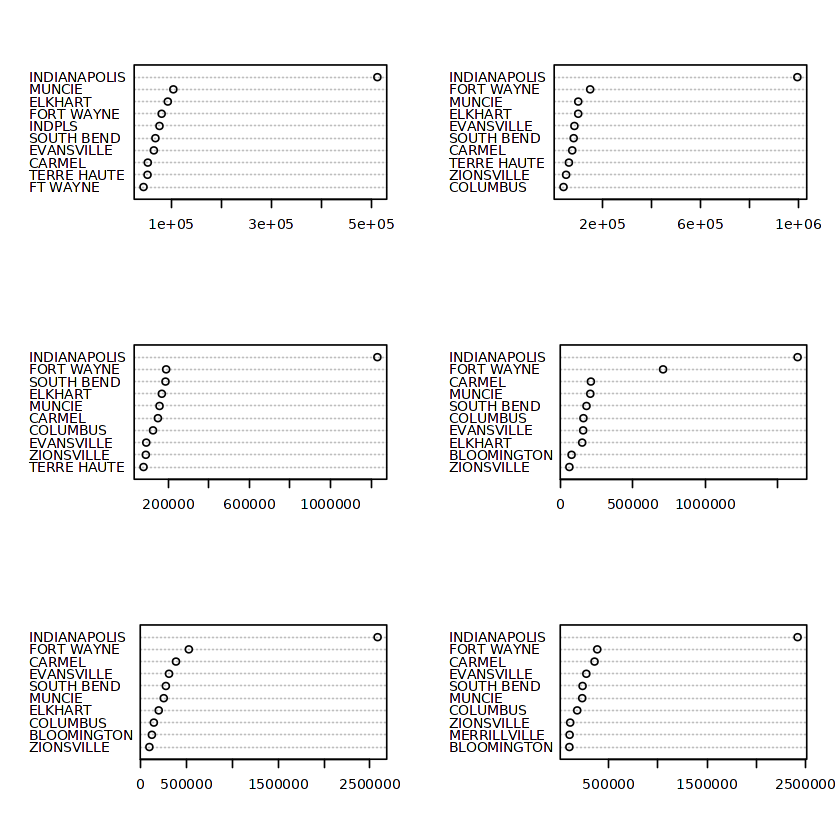

In [49]:
myresults <- lapply( seq(1984,1994,by=2), myindycitiess )
names(myresults) <- seq(1984,1994,by=2, )

myresults

par(mfrow=c(3,2))
myresults <- sapply(seq(1984,1994,by=2), function(x) dotchart(myindycitiess(x)))

#We look at the top cities based on year
#we are putting each in a dotchart

Markdown notes and sentences and analysis written here.

## Question 5

In [53]:
myavgstars <- function(name){
    myDF <- fread(paste0("/anvil/projects/tdm/data/icecream/",name,"/reviews.csv"))
    myvalue <- mean(myDF$stars, na.rm = TRUE)
    return(myvalue)
    }
#creating a cuntion that reads in a name of icecream brand
#We find the mean of their stars column

In [54]:
mycompanies <- c("bj", "breyers", "hd", "talenti")
#We creating an array with 4 names to call all of them at the same time 

In [55]:
sapply(mycompanies, myavgstars)
#we use sapply to find all 4 star means at once 

bj  breyers       hd  talenti 
4.305804 4.027961 4.218475 4.311624

Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.